<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

More people, more problems? Oscar the Grouch seems to think so. Oscar is not a fan of any who pass by his trash can and has become convinced that the stress of constantly having so many people around is going to shorten his life. He has hired me to investigate this concern for him. 



There is no denying that, globally, we are living longer lives than our ancestors did back in the early 1900s. There is also no denying that our population is growing at an exponential rate. However, is our life expectancy starting to shorten? When it comes to of the human race, there is a lack of clarity on whether a correlation exists between the density in a country's population and the average lifespan of that country's occupents. This project aims to investigate the relationship between a country's population and the average lifespan, and provide evidence to support or oppose the the claim that exponentially growing populations are shortening the average lifespan.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Within this project I will be comparing data on the topics of population and life expentency for the top 5 most and least populated countries in the world in the year of 2023. These World Development Statistics derive from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation who's goal is to make data about the world more accessible and reliable for those who are interested.

### Data Used:

**For the purpose of this project I will explore the following datasets:**
- `population.csv`: Population by Country
- `life_expectancy.csv`: Life Expentancy by Country

### Outside Research

More people, more problems?

There is no denying that, globally, we are living longer lives than our ancestors did back in the early 1900s. There is also no denying that our population is growing at an exponential rate. With a booming population rate, is there a correlation between population and declining average lifespan? Greeley G. (“Gregg”) Miklashek, MD, retired neuropsychiatrist, stress researcher and author of "STRESS R US", seems to believe so. 

In the article *[Population Density Stress Is Killing Us Now!](https://mahb.stanford.edu/blog/population-density-stress-killing-us-now/)*, author Gregg Miklashek summarizes that, 
>"human overpopulation and our modern life-style choices are causing physiological changes responsible for our top ten killing “diseases of civilization”"


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
test_num = [1, 8, 24, 90, 100, 4]

In [2]:
# Code:
def mean_list(num_list):
    return sum(num_list) / len(num_list)

In [3]:
mean_list(test_num)

37.833333333333336

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [4]:
# Code:
def std_dev(num_list):
    mean = sum(num_list) / len(num_list)
    total = 0
    for n in num_list:
        total += (n - mean)**2
    std = (total / len(num_list))**0.5
    return std

In [5]:
std_dev(test_num)

41.168016172212575

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [6]:
test1 = '5M'
test2 = '45K'
test3 = '1.4B'
test4 = '2k'
test5 = '9m'
test6 = '5b'

In [7]:
#Code:
def cleaning(value):
    if type(value) == float or type(value) == int:
        return(value)
    if 'K' in value:
        if len(value) > 1:
            return float(value.replace('K','')) * 1_000
        return 1_000.0
    if 'k' in value:
        if len(value) > 1:
            return float(value.replace('k','')) * 1_000
        return 1_000.0
    if 'M' in value:
        if len(value) > 1:
            return float(value.replace('M', ''))* 1000_000
        return 1000_000.0
    if 'm' in value:
        if len(value) > 1:
            return float(value.replace('m', ''))* 1000_000
        return 1000_000.0
    if 'B' in value:
        if len(value) > 1:
            return float(value.replace('B', '')) * 1000_000_000
        return 1000_000_000.0
    if 'b' in value:
        if len(value) > 1:
            return float(value.replace('b', '')) * 1000_000_000
        return 1000_000_000.0
    return value

In [8]:
cleaning(test1)

5000000.0

In [9]:
cleaning(test2)

45000.0

In [10]:
cleaning(test3)

1400000000.0

In [11]:
cleaning(test4)

2000.0

In [12]:
cleaning(test5)

9000000.0

In [13]:
cleaning(test6)

5000000000.0

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [14]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [15]:
# Code:
# 1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.

life = pd.read_csv('../data/life_expectancy.csv')
life.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [16]:
pop = pd.read_csv('../data/population.csv')
pop.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [17]:
# 2. Check for missing values.
life.isnull()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
sum(life.isnull().sum())

2079

In [19]:
pop.isnull()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
sum(pop.isnull().sum())

100

In [21]:
# 3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
    # in life there are 9 countries that do not have data submitted until 1949 / 1950 and have no data after 2020
    # in the population there are 100 missing missing data points
    
    
# and 4. Fix any errors you identified in steps 2-3.
    # I am filling the missing values of life expectancy with their row averages
life_fill = round(life.where(life.notna(), life.mean(axis=1), axis=0), 1)
life_fill

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_11666/2682795725.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  life_fill = round(life.where(life.notna(), life.mean(axis=1), axis=0), 1)


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,78.7,78.7,78.7,78.7,78.7,78.7,78.7,78.7,78.7,...,78.7,78.7,78.7,78.7,78.7,78.7,78.7,78.7,78.7,78.7
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.8,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,76.9,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.4,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1


In [22]:
    # I am filling the missing values of population with their row averages
pop_fill = round(pop.where(pop.notna(), pop.mean(axis=1), axis=0), 1)
pop_fill

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_11666/3182534440.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pop_fill = round(pop.where(pop.notna(), pop.mean(axis=1), axis=0), 1)


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,432k,434k,435k,436k,437k,438k,439k,440k,441k,441k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,73.2M,73.3M,73.5M,73.6M,73.7M,73.8M,73.9M,74M,74.1M,74.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,75.6M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.8M,74.7M,74.6M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,60.3M,60.7M,61.1M,61.5M,61.9M,62.2M,62.6M,62.9M,63.3M,63.6M


In [23]:
# 5. Display the data types of each feature.
# life: 301 floats, 1 object
life_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [24]:
# 302 objects
pop_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


In [25]:
# 6. Fix any incorrect data types found in step 5.
    # in pop_csv values are given in terms of K, M, B. I am going to apply my earlier function to clean that up
        # I dont want to apply the function to every single column becuase I want the Country names to be preserved
for col in list(pop_fill.columns)[1:]:
    pop_fill[col] = pop_fill[col].apply(cleaning)

In [26]:
pop_fill.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
1,Angola,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
2,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,1350000.0,1320000.0,1290000.0,1260000.0,1230000.0,1210000.0,1180000.0,1150000.0,1120000.0,1100000.0
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62500.0,62200.0,61900.0,61700.0,61400.0,61200.0,60900.0,60700.0,60500.0,60200.0
4,United Arab Emirates,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,...,13500000.0,13500000.0,13600000.0,13700000.0,13800000.0,13800000.0,13900000.0,14000000.0,14000000.0,14100000.0
5,Argentina,534000.0,520000.0,506000.0,492000.0,479000.0,466000.0,453000.0,441000.0,429000.0,...,49300000.0,49100000.0,48900000.0,48700000.0,48500000.0,48300000.0,48200000.0,48000000.0,47800000.0,47600000.0
6,Armenia,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,...,1780000.0,1760000.0,1740000.0,1720000.0,1700000.0,1680000.0,1660000.0,1640000.0,1620000.0,1600000.0
7,Antigua and Barbuda,37000.0,37000.0,37000.0,37000.0,37000.0,37000.0,37000.0,37000.0,37000.0,...,81100.0,80600.0,80000.0,79500.0,79000.0,78500.0,78000.0,77500.0,77000.0,76500.0
8,Australia,200000.0,205000.0,211000.0,216000.0,222000.0,227000.0,233000.0,239000.0,246000.0,...,37200000.0,37300000.0,37400000.0,37500000.0,37600000.0,37700000.0,37800000.0,37900000.0,38000000.0,38100000.0
9,Austria,3000000.0,3020000.0,3040000.0,3050000.0,3070000.0,3090000.0,3110000.0,3120000.0,3140000.0,...,8040000.0,8030000.0,8010000.0,8000000.0,7990000.0,7980000.0,7970000.0,7960000.0,7950000.0,7950000.0


In [27]:
#7. Rename Columns.     
# - Column names should be all lowercase. 
    # CHECK
# - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    # CHECK but if not can use below:
            # life.columns.str.replace(' ', '')
            # pop.columns.str.replace(' ', '')
# - Column names should be unique and informative.
    # Column Names are the years


In [28]:
#8. Drop unnecessary rows (if needed).
    # Once I transpose the dataframe, I then drop rows prior to 1950 and after 2023

In [29]:
top_5_pop = pop_fill.sort_values(by=['2023'], ascending=False)
top_5_countries_by_population = top_5_pop.head()
top_5_countries_by_population

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
79,India,201000000.0,201000000.0,202000000.0,202000000.0,202000000.0,203000000.0,203000000.0,204000000.0,204000000.0,...,1.590000e+09,1.580000e+09,1.580000e+09,1.570000e+09,1.560000e+09,1.560000e+09,1.550000e+09,1.540000e+09,1.540000e+09,1.530000e+09
32,China,330000000.0,332000000.0,333000000.0,335000000.0,336000000.0,338000000.0,339000000.0,341000000.0,343000000.0,...,8.530000e+08,8.430000e+08,8.330000e+08,8.230000e+08,8.140000e+08,8.040000e+08,7.950000e+08,7.850000e+08,7.760000e+08,7.670000e+08
186,United States,6000000.0,6110000.0,6230000.0,6350000.0,6470000.0,6590000.0,6720000.0,6840000.0,6970000.0,...,3.930000e+08,3.930000e+08,3.930000e+08,3.930000e+08,3.930000e+08,3.940000e+08,3.940000e+08,3.940000e+08,3.940000e+08,3.940000e+08
78,Indonesia,16100000.0,16200000.0,16200000.0,16200000.0,16300000.0,16300000.0,16400000.0,16400000.0,16400000.0,...,3.050000e+08,3.040000e+08,3.030000e+08,3.020000e+08,3.010000e+08,3.010000e+08,3.000000e+08,2.990000e+08,2.980000e+08,2.970000e+08
136,Pakistan,13100000.0,13100000.0,13200000.0,13200000.0,13200000.0,13200000.0,13300000.0,13300000.0,13300000.0,...,4.800000e+08,4.810000e+08,4.820000e+08,4.830000e+08,4.840000e+08,4.850000e+08,4.850000e+08,4.860000e+08,4.860000e+08,4.870000e+08


In [30]:
bottom_5_pop = pop_fill.sort_values(by=['2023'], ascending=True)
bottom_5_countries_by_population = bottom_5_pop.head()
bottom_5_countries_by_population

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
180,Tuvalu,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,14400.0,14400.0,14400.0,14400.0,14400.0,14300.0,14300.0,14300.0,14200.0,14200.0
133,Nauru,1830,1830,1830,1830,1830,1830,1830,1830,1830,...,13400.0,13300.0,13200.0,13100.0,13000.0,12900.0,12800.0,12600.0,12500.0,12400.0
140,Palau,3880,3880,3880,3880,3880,3880,3880,3880,3880,...,14600.0,14500.0,14400.0,14400.0,14300.0,14300.0,14200.0,14100.0,14100.0,14000.0
158,San Marino,5490,5490,5490,5490,5490,5490,5490,5490,5490,...,26700.0,26600.0,26600.0,26500.0,26400.0,26400.0,26300.0,26200.0,26200.0,26100.0
109,Monaco,7790,7790,7790,7790,7790,7790,7790,7790,7790,...,48300.0,48600.0,48900.0,49200.0,49500.0,49700.0,50000.0,50300.0,50600.0,50900.0


In [31]:
top_5_countries_by_life = life_fill.loc[((life_fill['country'] == 'India') | (life_fill['country'] == 'China') | (life_fill['country'] == 'United States') | (life_fill['country'] == 'Indonesia') | (life['country'] == 'Pakistan')),:]
top_5_countries_by_life

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
32,China,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,87.7,87.8,87.9,88.0,88.1,88.2,88.3,88.4,88.5,88.7
77,Indonesia,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,82.5,82.6,82.7,82.8,83.0,83.1,83.3,83.4,83.5,83.6
78,India,25.4,25.4,25.0,24.0,23.5,25.4,25.4,25.4,25.4,...,82.1,82.2,82.3,82.5,82.6,82.8,82.9,83.0,83.2,83.3
134,Pakistan,25.8,25.8,25.8,25.8,25.8,25.8,25.8,25.8,25.8,...,74.9,75.0,75.2,75.3,75.4,75.6,75.7,75.8,76.0,76.1
184,United States,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,...,88.0,88.1,88.2,88.3,88.4,88.5,88.6,88.7,88.8,88.9


In [32]:
bottom_5_countries_by_life = life_fill.loc[((life['country'] == 'Tuvalu') | (life_fill['country'] == 'Nauru') | (life_fill['country'] == 'Palau') | (life_fill['country'] == 'San Marino') | (life['country'] == 'Monaco')),:]
bottom_5_countries_by_life

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
107,Monaco,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7,...,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7
131,Nauru,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1,...,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1
138,Palau,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,...,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5
156,San Marino,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6,...,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6
178,Tuvalu,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9,...,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9


In [33]:
# 9. Merge dataframes that can be merged.
population_stacked = pd.concat([top_5_countries_by_population, bottom_5_countries_by_population], ignore_index=True,axis=0)
population_stacked

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,India,201000000.0,201000000.0,202000000.0,202000000.0,202000000.0,203000000.0,203000000.0,204000000.0,204000000.0,...,1.590000e+09,1.580000e+09,1.580000e+09,1.570000e+09,1.560000e+09,1.560000e+09,1.550000e+09,1.540000e+09,1.540000e+09,1.530000e+09
1,China,330000000.0,332000000.0,333000000.0,335000000.0,336000000.0,338000000.0,339000000.0,341000000.0,343000000.0,...,8.530000e+08,8.430000e+08,8.330000e+08,8.230000e+08,8.140000e+08,8.040000e+08,7.950000e+08,7.850000e+08,7.760000e+08,7.670000e+08
2,United States,6000000.0,6110000.0,6230000.0,6350000.0,6470000.0,6590000.0,6720000.0,6840000.0,6970000.0,...,3.930000e+08,3.930000e+08,3.930000e+08,3.930000e+08,3.930000e+08,3.940000e+08,3.940000e+08,3.940000e+08,3.940000e+08,3.940000e+08
3,Indonesia,16100000.0,16200000.0,16200000.0,16200000.0,16300000.0,16300000.0,16400000.0,16400000.0,16400000.0,...,3.050000e+08,3.040000e+08,3.030000e+08,3.020000e+08,3.010000e+08,3.010000e+08,3.000000e+08,2.990000e+08,2.980000e+08,2.970000e+08
4,Pakistan,13100000.0,13100000.0,13200000.0,13200000.0,13200000.0,13200000.0,13300000.0,13300000.0,13300000.0,...,4.800000e+08,4.810000e+08,4.820000e+08,4.830000e+08,4.840000e+08,4.850000e+08,4.850000e+08,4.860000e+08,4.860000e+08,4.870000e+08
5,Tuvalu,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,1.440000e+04,1.440000e+04,1.440000e+04,1.440000e+04,1.440000e+04,1.430000e+04,1.430000e+04,1.430000e+04,1.420000e+04,1.420000e+04
6,Nauru,1830,1830,1830,1830,1830,1830,1830,1830,1830,...,1.340000e+04,1.330000e+04,1.320000e+04,1.310000e+04,1.300000e+04,1.290000e+04,1.280000e+04,1.260000e+04,1.250000e+04,1.240000e+04
7,Palau,3880,3880,3880,3880,3880,3880,3880,3880,3880,...,1.460000e+04,1.450000e+04,1.440000e+04,1.440000e+04,1.430000e+04,1.430000e+04,1.420000e+04,1.410000e+04,1.410000e+04,1.400000e+04
8,San Marino,5490,5490,5490,5490,5490,5490,5490,5490,5490,...,2.670000e+04,2.660000e+04,2.660000e+04,2.650000e+04,2.640000e+04,2.640000e+04,2.630000e+04,2.620000e+04,2.620000e+04,2.610000e+04
9,Monaco,7790,7790,7790,7790,7790,7790,7790,7790,7790,...,4.830000e+04,4.860000e+04,4.890000e+04,4.920000e+04,4.950000e+04,4.970000e+04,5.000000e+04,5.030000e+04,5.060000e+04,5.090000e+04


In [34]:
life_expectancy_stacked = pd.concat([top_5_countries_by_life, bottom_5_countries_by_life], ignore_index=True,axis=0)
life_expectancy_stacked

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,China,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,87.7,87.8,87.9,88.0,88.1,88.2,88.3,88.4,88.5,88.7
1,Indonesia,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,82.5,82.6,82.7,82.8,83.0,83.1,83.3,83.4,83.5,83.6
2,India,25.4,25.4,25.0,24.0,23.5,25.4,25.4,25.4,25.4,...,82.1,82.2,82.3,82.5,82.6,82.8,82.9,83.0,83.2,83.3
3,Pakistan,25.8,25.8,25.8,25.8,25.8,25.8,25.8,25.8,25.8,...,74.9,75.0,75.2,75.3,75.4,75.6,75.7,75.8,76.0,76.1
4,United States,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,...,88.0,88.1,88.2,88.3,88.4,88.5,88.6,88.7,88.8,88.9
5,Monaco,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7,...,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7,75.7
6,Nauru,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1,...,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1,61.1
7,Palau,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,...,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5
8,San Marino,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6,...,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6,77.6
9,Tuvalu,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9,...,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9,58.9


In [35]:
# 10. Perform any additional cleaning that you feel is necessary.
    # I am swapping axes so that creating a line graph is easier

In [36]:
pop_swap = population_stacked.T.reset_index().rename(columns = {'index' : 'years', 
                                                                0 : 'India', 
                                                                1 : 'China', 
                                                                2 : 'United States', 
                                                                3 : 'Indonesia', 
                                                                4 : 'Pakistan', 
                                                                5 : 'Tuvalu', 
                                                                6 : 'Nauru', 
                                                                7 : 'Palau', 
                                                                8 : 'San Marino', 
                                                                9 : 'Monaco'}).drop(range(0,151))
pop_swap = pop_swap.drop(range(225,302))
pop_swap

,years,India,China,United States,Indonesia,Pakistan,Tuvalu,Nauru,Palau,San Marino,Monaco
151,1950,357000000.0,544000000.0,148000000.0,69600000.0,37700000.0,4730,3350,7430,13000.0,19700.0
152,1951,365000000.0,554000000.0,151000000.0,71000000.0,38200000.0,4860,3410,7530,13200.0,19900.0
153,1952,373000000.0,565000000.0,153000000.0,72600000.0,38800000.0,4970,3510,7640,13300.0,19700.0
154,1953,381000000.0,577000000.0,155000000.0,74200000.0,39500000.0,5060,3610,7800,13500.0,20000.0
155,1954,390000000.0,590000000.0,158000000.0,75900000.0,40200000.0,5140,3700,8010,13800.0,20300.0
...,...,...,...,...,...,...,...,...,...,...,...
220,2019,1380000000.0,1420000000.0,334000000.0,270000000.0,223000000.0,11000.0,12100.0,17900.0,34200.0,37000.0
221,2020,1400000000.0,1420000000.0,336000000.0,272000000.0,227000000.0,11100.0,12300.0,18000.0,34000.0,36900.0
222,2021,1410000000.0,1430000000.0,337000000.0,274000000.0,231000000.0,11200.0,12500.0,18000.0,33700.0,36700.0
223,2022,1420000000.0,1430000000.0,338000000.0,276000000.0,236000000.0,11300.0,12700.0,18100.0,33700.0,36500.0


In [37]:
life_swap = life_expectancy_stacked.T.reset_index().rename(columns = {'index' : 'years', 
                                                                0 : 'India', 
                                                                1 : 'China', 
                                                                2 : 'United States', 
                                                                3 : 'Indonesia', 
                                                                4 : 'Pakistan', 
                                                                5 : 'Tuvalu', 
                                                                6 : 'Nauru', 
                                                                7 : 'Palau', 
                                                                8 : 'San Marino', 
                                                                9 : 'Monaco'}).drop(range(0,151))
life_swap = life_swap.drop(range(225,302))
life_swap

,years,India,China,United States,Indonesia,Pakistan,Tuvalu,Nauru,Palau,San Marino,Monaco
151,1950,41.6,36.4,43.4,46.0,68.3,68.2,58.5,49.0,72.0,47.0
152,1951,42.6,36.9,44.0,46.4,68.4,68.1,58.7,49.5,72.1,47.3
153,1952,43.6,37.8,44.5,47.2,68.6,68.3,59.0,49.9,72.2,47.8
154,1953,44.6,38.7,44.8,47.7,69.0,68.7,59.2,50.4,72.3,48.2
155,1954,46.5,39.6,45.4,48.1,69.7,69.0,59.4,50.9,72.4,48.7
...,...,...,...,...,...,...,...,...,...,...,...
220,2019,77.6,71.4,70.8,65.9,78.9,80.1,63.4,67.5,82.2,67.9
221,2020,77.7,71.4,70.8,65.9,77.0,75.7,61.1,61.5,77.6,58.9
222,2021,78.0,71.8,71.2,66.2,79.0,75.7,61.1,61.5,77.6,58.9
223,2022,78.1,71.9,71.5,66.3,79.1,75.7,61.1,61.5,77.6,58.9


### Data Dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**country**|object|life_expectancy.csv & population.csv| The name of all 195 countries in the world
|**population size**|object|population.csv|The population of all of the 195 countries in the world (units represented with abreviations "K", "M", and "B") from 1800 to the projected future of 2100|
|**life expectancy**|float|life_expectancy.csv|The average life expectancy of all 195 countries in the world from 1800 to the projected future of 2100|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [38]:
#Code:
# 1. Summary Statistics
    # Summary of life expentancy for all 195 countries
top_5_countries_by_population.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,6.380000e+08,6.460000e+08,6.540000e+08,6.600000e+08,6.678000e+08,6.760000e+08,6.818000e+08,6.894000e+08,6.972000e+08,7.010000e+08,...,7.242000e+08,7.202000e+08,7.182000e+08,7.142000e+08,7.104000e+08,7.088000e+08,7.048000e+08,7.008000e+08,6.988000e+08,6.950000e+08
std,5.534636e+08,5.594815e+08,5.655298e+08,5.691357e+08,5.753714e+08,5.812758e+08,5.850933e+08,5.915939e+08,5.979642e+08,5.988994e+08,...,5.270804e+08,5.224545e+08,5.219710e+08,5.173883e+08,5.128745e+08,5.121257e+08,5.077575e+08,5.032531e+08,5.030916e+08,4.986677e+08
min,1.780000e+08,1.820000e+08,1.860000e+08,1.900000e+08,1.940000e+08,1.990000e+08,2.020000e+08,2.050000e+08,2.080000e+08,2.110000e+08,...,3.050000e+08,3.040000e+08,3.030000e+08,3.020000e+08,3.010000e+08,3.010000e+08,3.000000e+08,2.990000e+08,2.980000e+08,2.970000e+08
25%,2.320000e+08,2.350000e+08,2.380000e+08,2.410000e+08,2.440000e+08,2.470000e+08,2.500000e+08,2.530000e+08,2.560000e+08,2.590000e+08,...,3.930000e+08,3.930000e+08,3.930000e+08,3.930000e+08,3.930000e+08,3.940000e+08,3.940000e+08,3.940000e+08,3.940000e+08,3.940000e+08
50%,3.000000e+08,3.030000e+08,3.060000e+08,3.090000e+08,3.110000e+08,3.140000e+08,3.170000e+08,3.190000e+08,3.220000e+08,3.250000e+08,...,4.800000e+08,4.810000e+08,4.820000e+08,4.830000e+08,4.840000e+08,4.850000e+08,4.850000e+08,4.860000e+08,4.860000e+08,4.870000e+08
75%,1.170000e+09,1.190000e+09,1.210000e+09,1.220000e+09,1.240000e+09,1.260000e+09,1.270000e+09,1.290000e+09,1.310000e+09,1.320000e+09,...,8.530000e+08,8.430000e+08,8.330000e+08,8.230000e+08,8.140000e+08,8.040000e+08,7.950000e+08,7.850000e+08,7.760000e+08,7.670000e+08
max,1.310000e+09,1.320000e+09,1.330000e+09,1.340000e+09,1.350000e+09,1.360000e+09,1.370000e+09,1.380000e+09,1.390000e+09,1.390000e+09,...,1.590000e+09,1.580000e+09,1.580000e+09,1.570000e+09,1.560000e+09,1.560000e+09,1.550000e+09,1.540000e+09,1.540000e+09,1.530000e+09


In [39]:
bottom_5_countries_by_population.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,20380.00000,20400.000000,20440.000000,20580.000000,20820.000000,21120.000000,21400.000000,21620.000000,21820.000000,22060.000000,...,23480.000000,23480.000000,23500.000000,23520.000000,23520.00000,23520.000000,23520.000000,23500.000000,23520.000000,23520.000000
std,10458.58499,10476.879306,10560.208331,10781.094564,11091.528299,11478.327404,11803.389344,11990.287736,12172.386783,12359.935275,...,14910.633789,15062.104767,15219.066988,15356.334198,15508.93291,15624.403989,15777.420575,15947.883872,16105.495956,16259.366531
min,10000.00000,10100.000000,10200.000000,10200.000000,10200.000000,10300.000000,10400.000000,10700.000000,10900.000000,10900.000000,...,13400.000000,13300.000000,13200.000000,13100.000000,13000.00000,12900.000000,12800.000000,12600.000000,12500.000000,12400.000000
25%,10300.00000,10300.000000,10300.000000,10400.000000,10600.000000,10700.000000,10900.000000,10900.000000,10900.000000,11200.000000,...,14400.000000,14400.000000,14400.000000,14400.000000,14300.00000,14300.000000,14200.000000,14100.000000,14100.000000,14000.000000
50%,19600.00000,19400.000000,19100.000000,18800.000000,18500.000000,18200.000000,17900.000000,17800.000000,17800.000000,17800.000000,...,14600.000000,14500.000000,14400.000000,14400.000000,14400.00000,14300.000000,14300.000000,14300.000000,14200.000000,14200.000000
75%,30000.00000,30400.000000,30700.000000,31100.000000,31600.000000,32500.000000,33100.000000,33300.000000,33400.000000,33600.000000,...,26700.000000,26600.000000,26600.000000,26500.000000,26400.00000,26400.000000,26300.000000,26200.000000,26200.000000,26100.000000
max,32000.00000,31800.000000,31900.000000,32400.000000,33200.000000,33900.000000,34700.000000,35400.000000,36100.000000,36800.000000,...,48300.000000,48600.000000,48900.000000,49200.000000,49500.00000,49700.000000,50000.000000,50300.000000,50600.000000,50900.000000


In [40]:
top_5_countries_by_life.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.0000,5.0000,5.000000,5.00000
mean,30.520000,30.520000,30.44000,30.240000,30.140000,30.520000,30.520000,30.520000,30.520000,30.520000,...,83.040000,83.140000,83.26000,83.380000,83.500000,83.640000,83.7600,83.8600,84.000000,84.12000
std,5.696666,5.696666,5.78861,6.035561,6.167495,5.696666,5.696666,5.696666,5.696666,5.696666,...,5.332729,5.332729,5.29462,5.290274,5.287722,5.245284,5.2429,5.2429,5.200481,5.22226
min,25.400000,25.400000,25.00000,24.000000,23.500000,25.400000,25.400000,25.400000,25.400000,25.400000,...,74.900000,75.000000,75.20000,75.300000,75.400000,75.600000,75.7000,75.8000,76.000000,76.10000
25%,25.800000,25.800000,25.80000,25.800000,25.800000,25.800000,25.800000,25.800000,25.800000,25.800000,...,82.100000,82.200000,82.30000,82.500000,82.600000,82.800000,82.9000,83.0000,83.200000,83.30000
50%,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,82.500000,82.600000,82.70000,82.800000,83.000000,83.100000,83.3000,83.4000,83.500000,83.60000
75%,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,87.700000,87.800000,87.90000,88.000000,88.100000,88.200000,88.3000,88.4000,88.500000,88.70000
max,39.400000,39.400000,39.40000,39.400000,39.400000,39.400000,39.400000,39.400000,39.400000,39.400000,...,88.000000,88.100000,88.20000,88.300000,88.400000,88.500000,88.6000,88.7000,88.800000,88.90000


In [41]:
bottom_5_countries_by_life.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000,...,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000,66.960000
std,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253,...,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253,8.926253
min,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,...,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000
25%,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000,...,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000,61.100000
50%,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000,...,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000,61.500000
75%,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000,...,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000,75.700000
max,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000,...,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000,77.600000


In [42]:
life_fill.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.00000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,33.169231,33.130769,33.146667,33.056410,33.128205,33.248205,33.303077,33.259487,33.05641,32.987692,...,82.633846,82.743077,82.861538,82.973333,83.088205,83.200000,83.315385,83.427179,83.541026,83.653333
std,8.601617,8.605607,8.658535,8.686196,8.660395,8.670172,8.703601,8.655101,8.74088,8.733373,...,6.757110,6.764125,6.769786,6.773121,6.780043,6.788924,6.793961,6.801791,6.809239,6.820091
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.50000,13.400000,...,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000,58.900000
25%,29.200000,29.150000,29.050000,29.050000,29.150000,29.200000,29.200000,29.200000,29.15000,28.950000,...,78.750000,78.850000,79.050000,79.150000,79.300000,79.450000,79.600000,79.700000,79.900000,80.000000
50%,32.000000,32.000000,31.900000,31.800000,31.900000,31.900000,32.000000,32.000000,31.90000,31.800000,...,83.700000,83.800000,84.000000,84.100000,84.200000,84.300000,84.400000,84.500000,84.700000,84.800000
75%,34.650000,34.950000,34.650000,34.300000,34.400000,34.650000,34.950000,34.650000,34.45000,34.300000,...,87.550000,87.650000,87.800000,87.900000,88.000000,88.100000,88.200000,88.300000,88.400000,88.550000
max,78.700000,78.700000,78.700000,78.700000,78.700000,78.700000,78.700000,78.700000,78.70000,78.700000,...,93.400000,93.500000,93.600000,93.700000,93.800000,94.000000,94.100000,94.200000,94.300000,94.400000


In [43]:
pop_fill.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,...,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,3.380646e+07,3.425617e+07,3.471633e+07,3.513464e+07,3.558583e+07,3.605452e+07,3.648243e+07,3.695143e+07,3.741744e+07,3.780043e+07,...,5.310722e+07,5.306187e+07,5.305661e+07,5.300677e+07,5.296208e+07,5.296894e+07,5.290835e+07,5.283635e+07,5.282393e+07,5.275957e+07
std,1.294097e+08,1.309375e+08,1.324716e+08,1.335599e+08,1.350836e+08,1.366357e+08,1.377318e+08,1.392717e+08,1.408135e+08,1.414205e+08,...,1.474633e+08,1.467771e+08,1.465834e+08,1.458823e+08,1.452205e+08,1.450683e+08,1.443758e+08,1.436683e+08,1.435129e+08,1.428314e+08
min,1.000000e+04,1.010000e+04,1.020000e+04,1.020000e+04,1.020000e+04,1.030000e+04,1.040000e+04,1.070000e+04,1.090000e+04,1.090000e+04,...,1.340000e+04,1.330000e+04,1.320000e+04,1.310000e+04,1.300000e+04,1.290000e+04,1.280000e+04,1.260000e+04,1.250000e+04,1.240000e+04
25%,1.657500e+06,1.707500e+06,1.765000e+06,1.822500e+06,1.882500e+06,1.950000e+06,2.015000e+06,2.037500e+06,2.055000e+06,2.067500e+06,...,1.890000e+06,1.877500e+06,1.867500e+06,1.855000e+06,1.842500e+06,1.830000e+06,1.820000e+06,1.807500e+06,1.797500e+06,1.785000e+06
50%,7.010000e+06,7.095000e+06,7.230000e+06,7.550000e+06,7.605000e+06,7.700000e+06,7.775000e+06,7.910000e+06,8.260000e+06,8.400000e+06,...,1.170000e+07,1.170000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.170000e+07
75%,2.222500e+07,2.267500e+07,2.307500e+07,2.325000e+07,2.372500e+07,2.442500e+07,2.497500e+07,2.550000e+07,2.627500e+07,2.700000e+07,...,4.877500e+07,4.850000e+07,4.822500e+07,4.795000e+07,4.767500e+07,4.732500e+07,4.707500e+07,4.680000e+07,4.667500e+07,4.685000e+07
max,1.310000e+09,1.320000e+09,1.330000e+09,1.340000e+09,1.350000e+09,1.360000e+09,1.370000e+09,1.380000e+09,1.390000e+09,1.390000e+09,...,1.590000e+09,1.580000e+09,1.580000e+09,1.570000e+09,1.560000e+09,1.560000e+09,1.550000e+09,1.540000e+09,1.540000e+09,1.530000e+09


In [44]:
# 2. Standard deviation

In [45]:
sd = {col: round(std_dev(top_5_countries_by_life[col]), 2) for col in top_5_countries_by_life.select_dtypes(include = np.number)}
sd

{'1800': 5.1,
 '1801': 5.1,
 '1802': 5.18,
 '1803': 5.4,
 '1804': 5.52,
 '1805': 5.1,
 '1806': 5.1,
 '1807': 5.1,
 '1808': 5.1,
 '1809': 5.1,
 '1810': 5.1,
 '1811': 5.1,
 '1812': 6.09,
 '1813': 5.1,
 '1814': 5.1,
 '1815': 5.1,
 '1816': 5.1,
 '1817': 5.1,
 '1818': 5.1,
 '1819': 5.1,
 '1820': 5.1,
 '1821': 5.1,
 '1822': 5.1,
 '1823': 5.1,
 '1824': 5.1,
 '1825': 5.1,
 '1826': 5.1,
 '1827': 5.1,
 '1828': 5.1,
 '1829': 5.1,
 '1830': 5.1,
 '1831': 5.1,
 '1832': 5.64,
 '1833': 5.9,
 '1834': 5.1,
 '1835': 5.1,
 '1836': 5.1,
 '1837': 5.33,
 '1838': 5.42,
 '1839': 5.1,
 '1840': 5.1,
 '1841': 5.1,
 '1842': 5.1,
 '1843': 5.1,
 '1844': 5.1,
 '1845': 5.1,
 '1846': 5.1,
 '1847': 5.1,
 '1848': 5.1,
 '1849': 5.1,
 '1850': 5.1,
 '1851': 5.05,
 '1852': 5.04,
 '1853': 5.06,
 '1854': 5.11,
 '1855': 5.2,
 '1856': 5.31,
 '1857': 5.23,
 '1858': 5.16,
 '1859': 5.11,
 '1860': 5.56,
 '1861': 5.32,
 '1862': 3.34,
 '1863': 3.25,
 '1864': 2.68,
 '1865': 4.62,
 '1866': 6.16,
 '1867': 5.1,
 '1868': 5.11,
 '1869': 6.0

3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [46]:
# 3. Investigating Trends

At the beginning of my cleaning stage, I noticed that there were multiple countries that did not have an average life expectancy entered between the years of 1800 till around 1949/50. When I began to look into these countries I learned that most of them were not "established" until that time frame. My belief is that is why there was not documentation of people's life expectancy until then. However, there was population recorded in all of these countries, starting from 1800. Therefore, when I filled in the missing information I felt comfortable usign the average life span recorded in those countries. 

Also, in the cleaning phase I sorted the countries by their population size according to their 2023 records. From there I took note of the top 5 most populated and the bottom 5 most populated as can be seen above in the data frames top_5_countries_by_population and bottojm_5_countries_by_population. I did notice that the top 5 countries were not any that were included in the forementioned missing data and that all 5 bottom countries were countries with missing data. There appears to be a positive correlation between time since the date of a country's establishment and their population. 

Another trend that I am noticing from merging dataframes is that there also seems to be a positive corelation between population and life expectancy that I will be exploring in the visualization.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

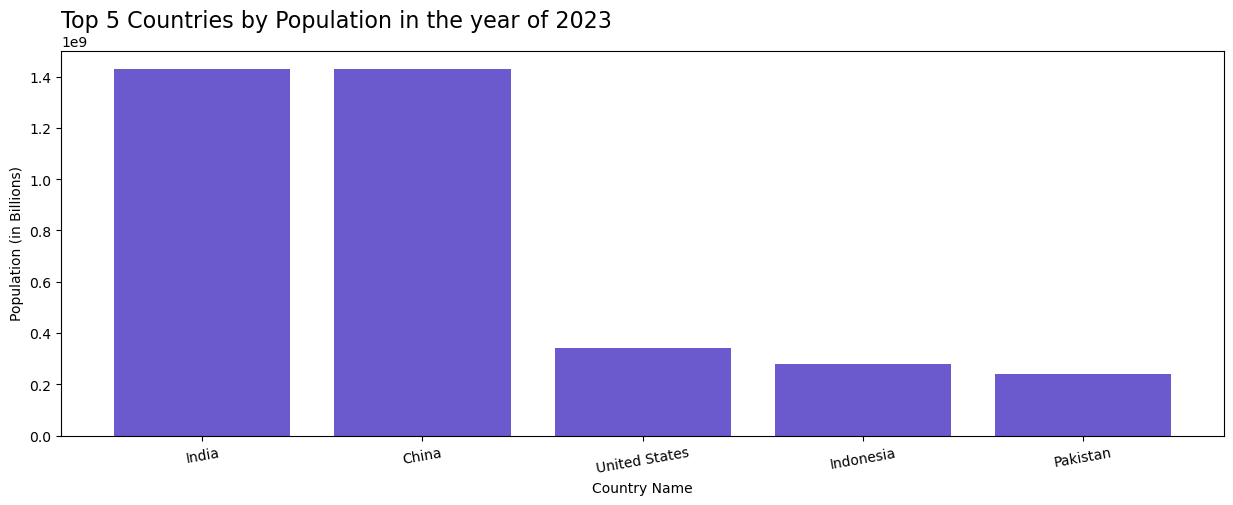

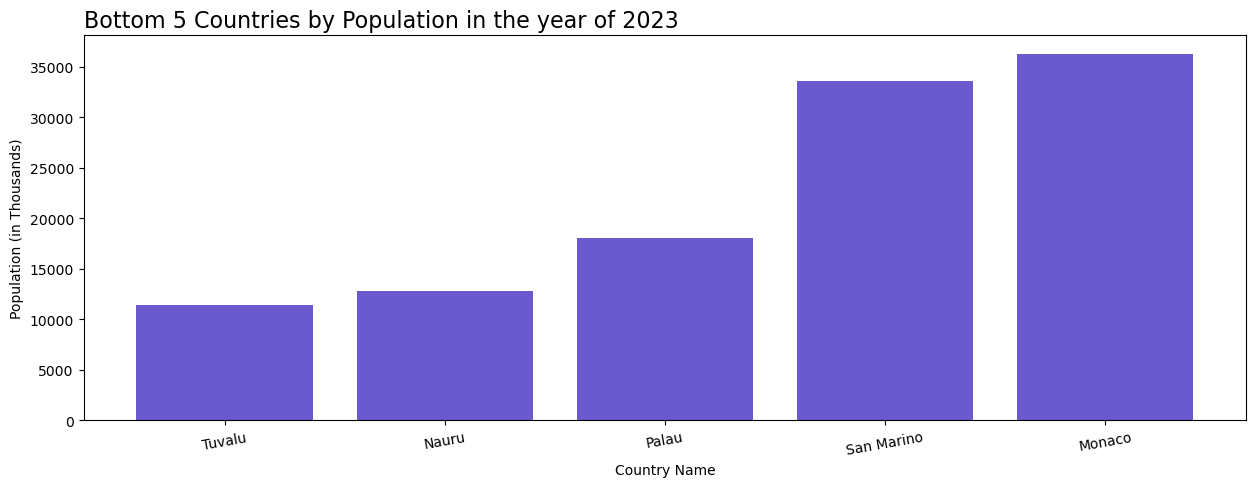

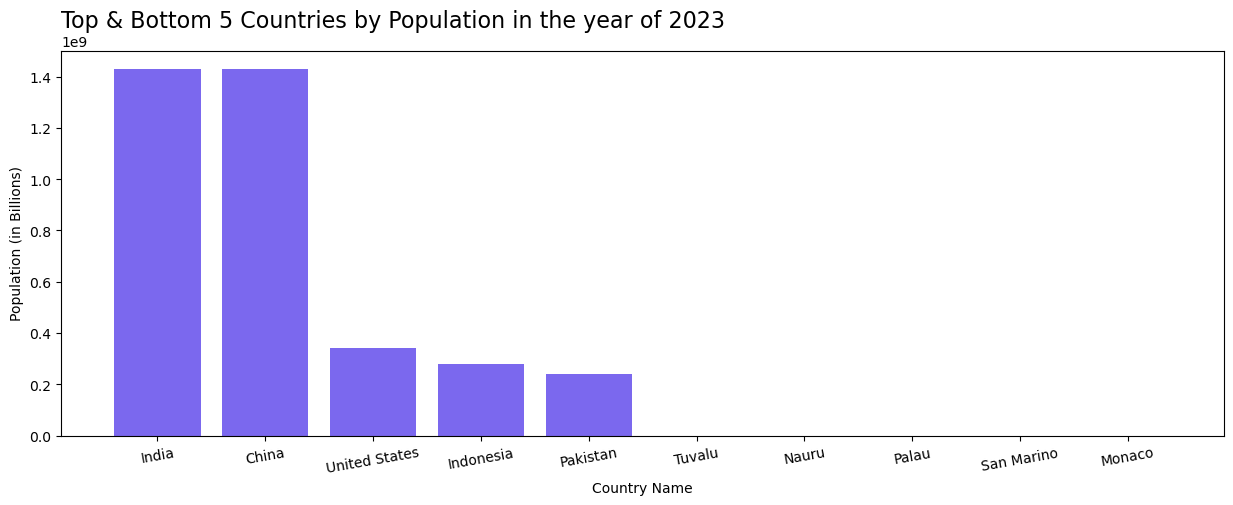

In [47]:
# Code
plt.figure(figsize = (15, 5))
plt.bar(top_5_countries_by_population['country'], top_5_countries_by_population['2023'], color = 'slateblue')
plt.xlabel('Country Name')
plt.ylabel('Population (in Billions)')
plt.title('Top 5 Countries by Population in the year of 2023', loc = 'left', size = 16)
plt.xticks(rotation = 10);
plt.savefig('top_5_pop_bar.png')


plt.figure(figsize = (15, 5))
plt.bar(bottom_5_countries_by_population['country'], bottom_5_countries_by_population['2023'], color = 'slateblue')
plt.xlabel('Country Name')
plt.ylabel('Population (in Thousands)')
plt.title('Bottom 5 Countries by Population in the year of 2023', loc = 'left', size = 16)
plt.xticks(rotation = 10);
plt.savefig('bottom_5_pop_bar.png')


plt.figure(figsize = (15, 5))
plt.bar(population_stacked['country'], population_stacked['2023'], color = 'mediumslateblue')
plt.xlabel('Country Name')
plt.ylabel('Population (in Billions)')
plt.title('Top & Bottom 5 Countries by Population in the year of 2023', loc = 'left', size = 16)
plt.xticks(rotation = 10);
plt.savefig('countries_pop_bar.png')


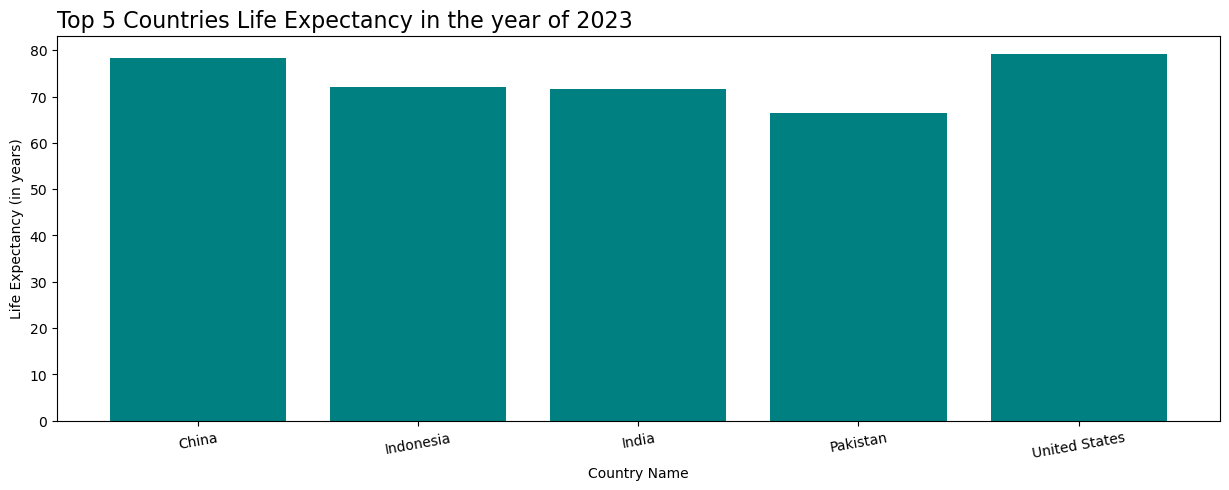

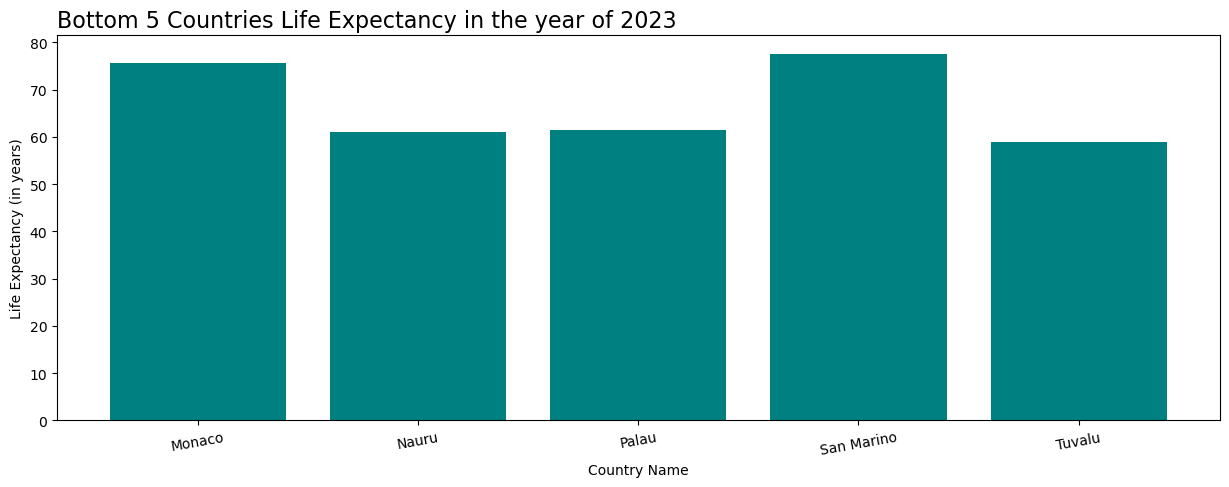

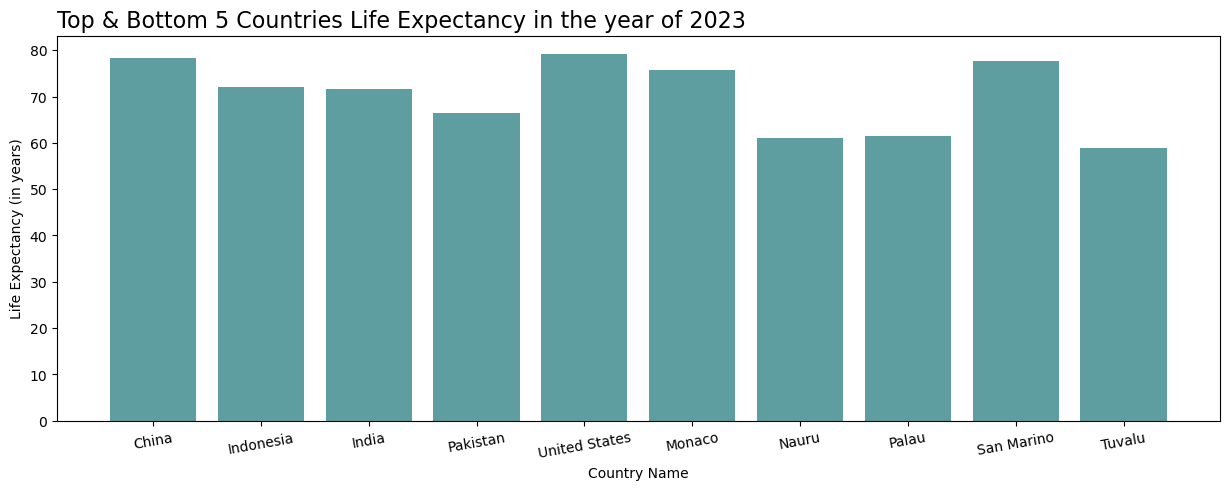

In [48]:
plt.figure(figsize = (15, 5))
plt.bar(top_5_countries_by_life['country'], top_5_countries_by_life['2023'], color = 'teal')
plt.xlabel('Country Name')
plt.ylabel('Life Expectancy (in years)')
plt.title('Top 5 Countries Life Expectancy in the year of 2023', loc = 'left', size = 16)
plt.xticks(rotation = 10);
plt.savefig('top_5_life_bar.png')



plt.figure(figsize = (15, 5))
plt.bar(bottom_5_countries_by_life['country'], bottom_5_countries_by_life['2023'], color = 'teal')
plt.xlabel('Country Name')
plt.ylabel('Life Expectancy (in years)')
plt.title('Bottom 5 Countries Life Expectancy in the year of 2023', loc = 'left', size = 16)
plt.xticks(rotation = 10);
plt.savefig('bottom_5_life_bar.png')


plt.figure(figsize = (15, 5))
plt.bar(life_expectancy_stacked['country'], life_expectancy_stacked['2023'], color = 'cadetblue')
plt.xlabel('Country Name')
plt.ylabel('Life Expectancy (in years)')
plt.title('Top & Bottom 5 Countries Life Expectancy in the year of 2023', loc = 'left', size = 16)
plt.xticks(rotation = 10);
plt.savefig('countries_life_bar.png')


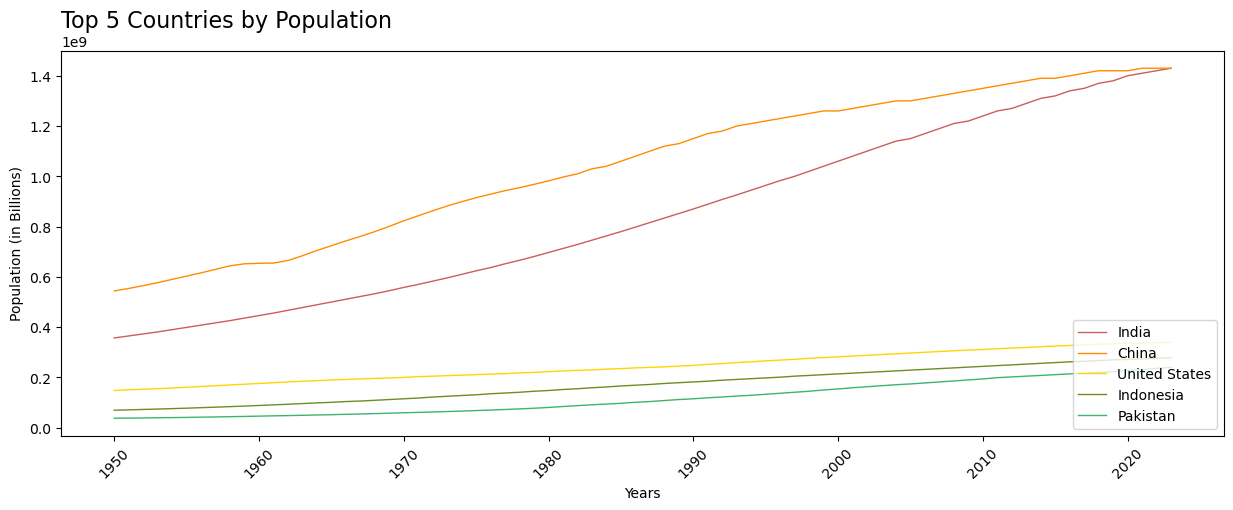

In [49]:
#figure of top 5 countries and their population over the years
x_tick_labels = ['1950', '1960', '1970', '1980', '1990','2000','2010', '2020']


plt.figure(figsize = (15, 5))
plt.plot(pop_swap['years'], pop_swap['India'], linewidth = 1, color = 'indianred', label = 'India')
plt.plot(pop_swap['years'], pop_swap['China'], linewidth = 1, color = 'darkorange', label = 'China')
plt.plot(pop_swap['years'], pop_swap['United States'], linewidth = 1, color = 'gold', label = 'United States')
plt.plot(pop_swap['years'], pop_swap['Indonesia'], linewidth = 1, color = 'olivedrab', label = 'Indonesia')
plt.plot(pop_swap['years'], pop_swap['Pakistan'], linewidth = 1, color = 'mediumseagreen', label = 'Pakistan')
plt.xticks(ticks = x_tick_labels, rotation = 45)
plt.xlabel('Years')
plt.ylabel('Population (in Billions)')
plt.title('Top 5 Countries by Population', loc = 'left', size = 16)
plt.legend(loc = 'lower right')
;
plt.savefig('top_5_pop_line.png')


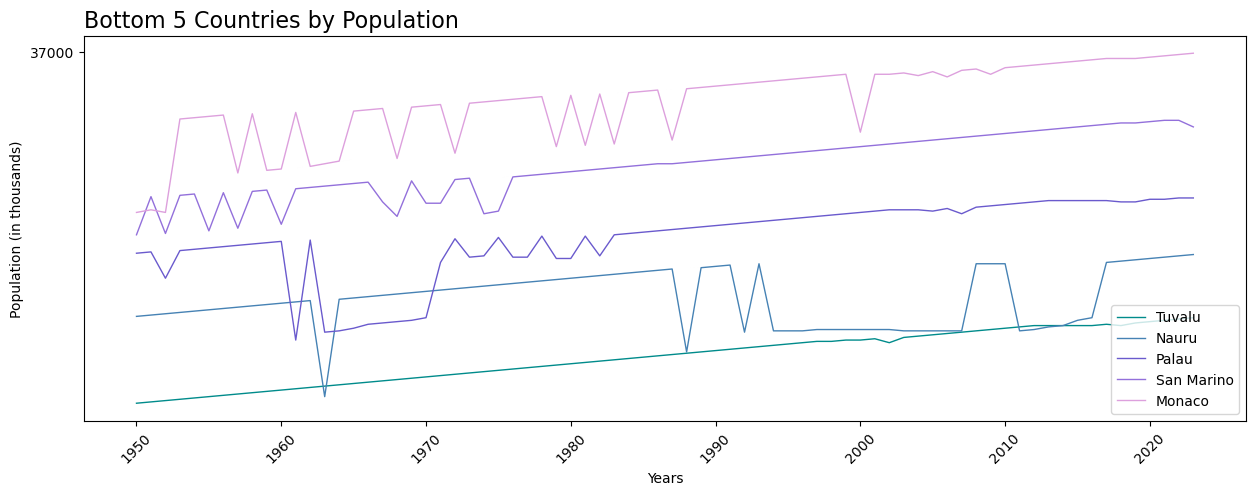

In [50]:
#figure of bottom 5 countries and their population over the years
pop_swap['Tuvalu'] = pop_swap['Tuvalu'].astype(str)
pop_swap['Nauru'] = pop_swap['Nauru'].astype(str)
pop_swap['Palau'] = pop_swap['Palau'].astype(str)
pop_swap['San Marino'] = pop_swap['San Marino'].astype(str)
pop_swap['Monaco'] = pop_swap['Monaco'].astype(str)

y_tick_labels = ['37000']


plt.figure(figsize = (15, 5))
plt.plot(pop_swap['years'], pop_swap['Tuvalu'], linewidth = 1, color = 'darkcyan', label = 'Tuvalu')
plt.plot(pop_swap['years'], pop_swap['Nauru'], linewidth = 1, color = 'steelblue', label = 'Nauru')
plt.plot(pop_swap['years'], pop_swap['Palau'], linewidth = 1, color = 'slateblue', label = 'Palau')
plt.plot(pop_swap['years'], pop_swap['San Marino'], linewidth = 1, color = 'mediumpurple', label = 'San Marino')
plt.plot(pop_swap['years'], pop_swap['Monaco'], linewidth = 1, color = 'plum', label = 'Monaco')
plt.xticks(ticks = x_tick_labels, rotation = 45)
plt.yticks(ticks = y_tick_labels)
plt.xlabel('Years')
plt.ylabel('Population (in thousands)')
plt.title('Bottom 5 Countries by Population', loc = 'left', size = 16)
plt.legend(loc = 'lower right')
;
plt.savefig('bottom_5_pop_line.png')


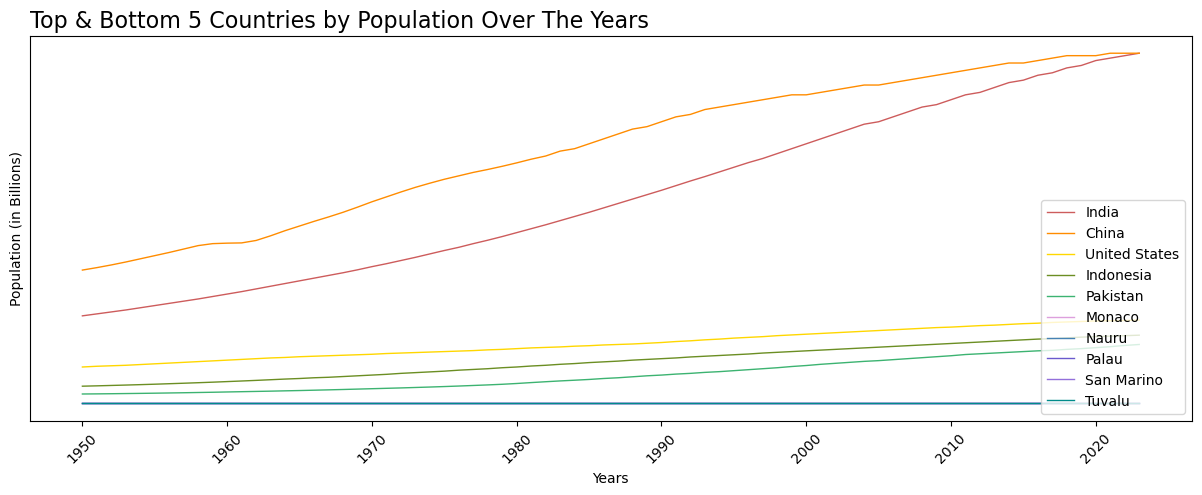

In [51]:
# all 10 countries population
plt.figure(figsize = (15, 5))
plt.plot(pop_swap['years'], pop_swap['India'], linewidth = 1, color = 'indianred', label = 'India')
plt.plot(pop_swap['years'], pop_swap['China'], linewidth = 1, color = 'darkorange', label = 'China')
plt.plot(pop_swap['years'], pop_swap['United States'], linewidth = 1, color = 'gold', label = 'United States')
plt.plot(pop_swap['years'], pop_swap['Indonesia'], linewidth = 1, color = 'olivedrab', label = 'Indonesia')
plt.plot(pop_swap['years'], pop_swap['Pakistan'], linewidth = 1, color = 'mediumseagreen', label = 'Pakistan')
plt.plot(pop_swap['years'], pop_swap['Monaco'], linewidth = 1, color = 'plum', label = 'Monaco')
plt.plot(pop_swap['years'], pop_swap['Nauru'], linewidth = 1, color = 'steelblue', label = 'Nauru')
plt.plot(pop_swap['years'], pop_swap['Palau'], linewidth = 1, color = 'slateblue', label = 'Palau')
plt.plot(pop_swap['years'], pop_swap['San Marino'], linewidth = 1, color = 'mediumpurple', label = 'San Marino')
plt.plot(pop_swap['years'], pop_swap['Tuvalu'], linewidth = 1, color = 'darkcyan', label = 'Tuvalu')
plt.xticks(ticks = x_tick_labels, rotation = 45)
plt.yticks([])
plt.xlabel('Years')
plt.ylabel('Population (in Billions)')
plt.title('Top & Bottom 5 Countries by Population Over The Years', loc = 'left', size = 16)
plt.legend(loc = 'lower right')
;
plt.savefig('countries_pop_line.png')


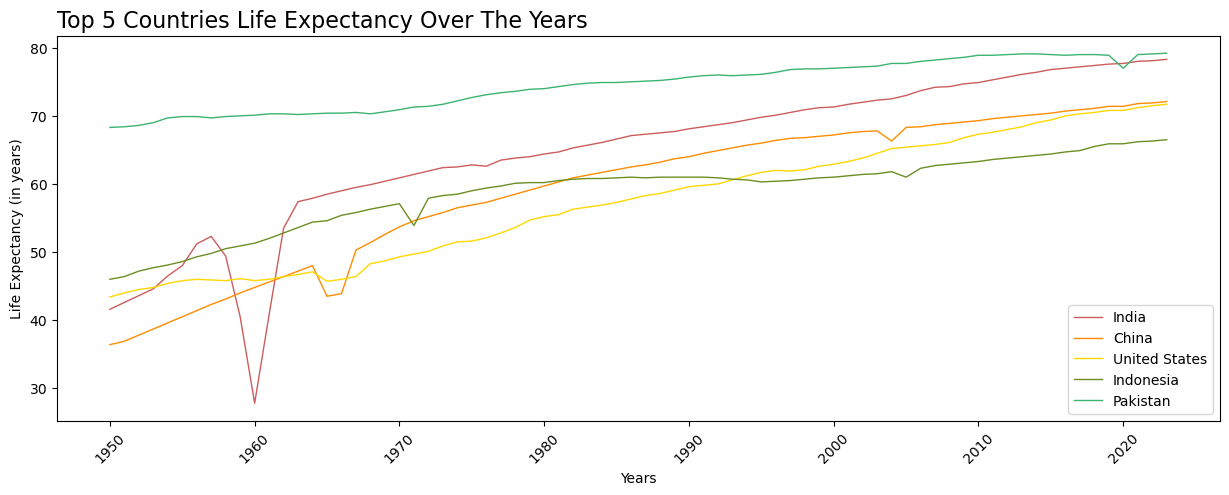

In [52]:
#figure of top 5 countries and their life expectancy over the years


plt.figure(figsize = (15, 5))
plt.plot(life_swap['years'], life_swap['India'], linewidth = 1, color = 'indianred', label = 'India')
plt.plot(life_swap['years'], life_swap['China'], linewidth = 1, color = 'darkorange', label = 'China')
plt.plot(life_swap['years'], life_swap['United States'], linewidth = 1, color = 'gold', label = 'United States')
plt.plot(life_swap['years'], life_swap['Indonesia'], linewidth = 1, color = 'olivedrab', label = 'Indonesia')
plt.plot(life_swap['years'], life_swap['Pakistan'], linewidth = 1, color = 'mediumseagreen', label = 'Pakistan')
plt.xticks(ticks = x_tick_labels, rotation = 45)
plt.xlabel('Years')
plt.ylabel('Life Expectancy (in years)')
plt.title('Top 5 Countries Life Expectancy Over The Years', loc = 'left', size = 16)
plt.legend(loc = 'lower right')
;
plt.savefig('top_5_life_line.png')


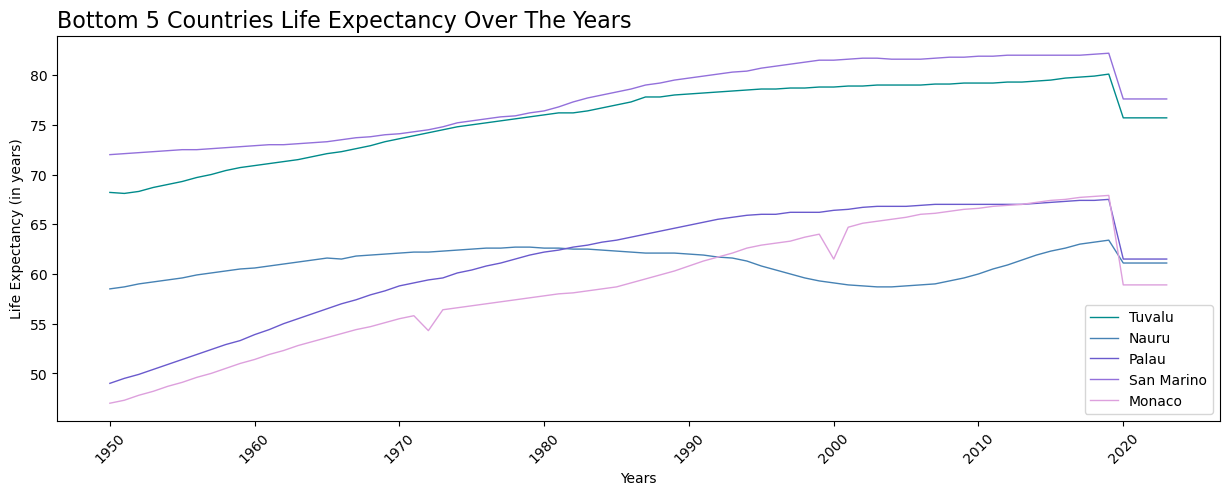

In [53]:
#figure of bottom 5 countries and their life expectancy over the years
plt.figure(figsize = (15, 5))
plt.plot(life_swap['years'], life_swap['Tuvalu'], linewidth = 1, color = 'darkcyan', label = 'Tuvalu')
plt.plot(life_swap['years'], life_swap['Nauru'], linewidth = 1, color = 'steelblue', label = 'Nauru')
plt.plot(life_swap['years'], life_swap['Palau'], linewidth = 1, color = 'slateblue', label = 'Palau')
plt.plot(life_swap['years'], life_swap['San Marino'], linewidth = 1, color = 'mediumpurple', label = 'San Marino')
plt.plot(life_swap['years'], life_swap['Monaco'], linewidth = 1, color = 'plum', label = 'Monaco')
plt.xticks(ticks = x_tick_labels, rotation = 45)
plt.xlabel('Years')
plt.ylabel('Life Expectancy (in years)')
plt.title('Bottom 5 Countries Life Expectancy Over The Years', loc = 'left', size = 16)
plt.legend(loc = 'lower right')
;
plt.savefig('bottom_5_life_line.png')


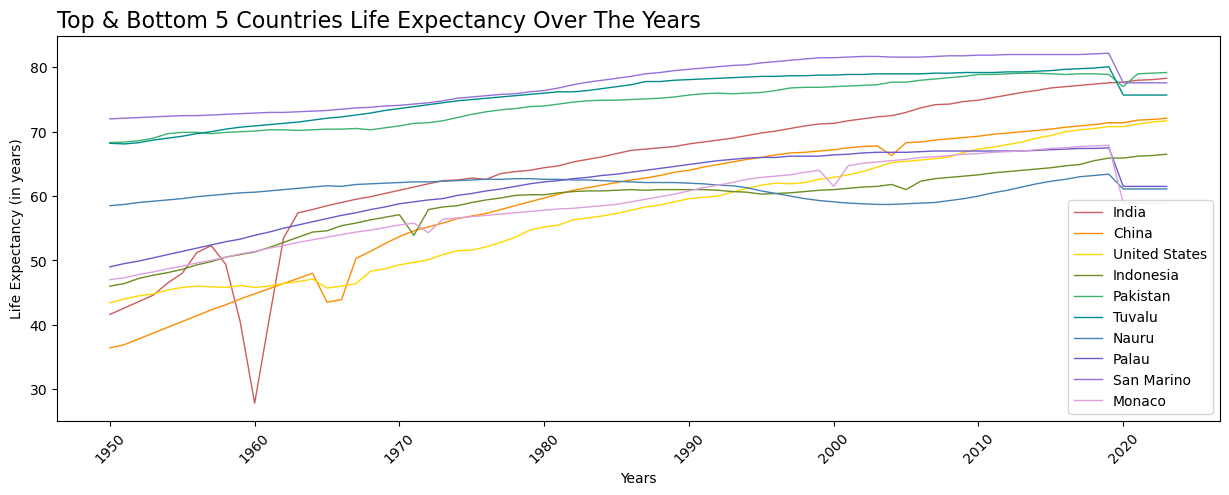

In [54]:
#figure of all 10 countries and their life expectancy over the years
plt.figure(figsize = (15, 5))
plt.plot(life_swap['years'], life_swap['India'], linewidth = 1, color = 'indianred', label = 'India')
plt.plot(life_swap['years'], life_swap['China'], linewidth = 1, color = 'darkorange', label = 'China')
plt.plot(life_swap['years'], life_swap['United States'], linewidth = 1, color = 'gold', label = 'United States')
plt.plot(life_swap['years'], life_swap['Indonesia'], linewidth = 1, color = 'olivedrab', label = 'Indonesia')
plt.plot(life_swap['years'], life_swap['Pakistan'], linewidth = 1, color = 'mediumseagreen', label = 'Pakistan')
plt.plot(life_swap['years'], life_swap['Tuvalu'], linewidth = 1, color = 'darkcyan', label = 'Tuvalu')
plt.plot(life_swap['years'], life_swap['Nauru'], linewidth = 1, color = 'steelblue', label = 'Nauru')
plt.plot(life_swap['years'], life_swap['Palau'], linewidth = 1, color = 'slateblue', label = 'Palau')
plt.plot(life_swap['years'], life_swap['San Marino'], linewidth = 1, color = 'mediumpurple', label = 'San Marino')
plt.plot(life_swap['years'], life_swap['Monaco'], linewidth = 1, color = 'plum', label = 'Monaco')
plt.xticks(ticks = x_tick_labels, rotation = 45)
plt.xlabel('Years')
plt.ylabel('Life Expectancy (in years)')
plt.title('Top & Bottom 5 Countries Life Expectancy Over The Years', loc = 'left', size = 16)
plt.legend(loc = 'lower right')
;
plt.savefig('countries_life_line.png')


## Conclusions and Recommendations

So, do more people nationwide have correlation with the nation's members lifespan? My conclusion is that there is not a correlaton between population density and the life expectancy of those inhabitating the environments. 


As a reminder, in this exploration I computed the top and bottom 5 countries with the highest and lowest population recorded for the year of 2023. The top 5 countries with the largest population in 2023 are India, China, United States, Indonesia, Pakistan. The bottom 5 countries with the smallest population in 2023 are Tuvalu, Nauru, Palau, San Marino, Monaco.

In the above figures, I have explored the top and bottom 5 countries on their own as well as together between the years of 1950 to the current year of 2023. The figure titled "Top & Bottom 5 Countries Life Expectancy Over The Years" paints a pretty clear picutre. In this figure we can see that outside of Pakistan (top 5), Tuvalu (bottom 5), and San Marino (bottom 5), the other 7 countries tend to follow the same trend and trajectory. It is worth noting that those 3 countries, Pakistan, Tuvalu, and San Marino, have always had a much higher life expectancy within the years that have been explored. 

Below is a list of some recommendations / further explorations:
- What is healthcare like in all 10 countries? How does that play a role in the life expectancy?
- What are those 3 countries doing differently the rest to have such a high avg lifespan?
- When were these countries established? Does that have any correlation to life expectancy? 
- The 3 countries with the high life expectancy are not located near eachother, yet they follow the same trend. Why?